In [1]:
using StateSpaceDynamics, Plots


In [2]:
model = initialize_slds()

SwitchingLinearDynamicalSystem([0.96 0.04; 0.04 0.96], StateSpaceDynamics.LinearDynamicalSystem[StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([0.9452539570141245 -0.09484174581448675; 0.09484174581448675 0.9452539570141245], [0.001 0.0; 0.0 0.001], [0.0, 0.0], [0.001 0.0; 0.0 0.001]), StateSpaceDynamics.GaussianObservationModel{Float64}([-0.31498797116895605 0.4338858743048611; -0.31125240132442067 -0.3954398407537453; … ; -0.8253345499750688 -0.9654904870197227; 0.840288523245819 0.9656607495563969], [0.001 0.0 … 0.0 0.0; 0.0 0.001 … 0.0 0.0; … ; 0.0 0.0 … 0.001 0.0; 0.0 0.0 … 0.0 0.001]), 2, 10, Bool[1, 1, 1, 1, 1, 1]), StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([-0.39533949471978524 -0.86383255548

In [3]:
T = 1000
# Generate synthetic data
x, y, z = sample(model, T)


([0.012781148406102944 -0.043551433682513074 … 0.009189945184785569 0.03215941558734649; 0.03788281101630884 -0.021698572664429976 … -0.08498702535863965 -0.10696223889695361], [-0.0037362031674817945 0.011184638740456908 … -0.07094318488635357 -0.05032349162445888; 0.01979088919057409 0.030620168627788782 … 0.03078518538867422 0.0675583423786563; … ; -0.06176123606409473 0.086548578688241 … 0.13735992748512493 0.03213684839745743; 0.042094688716242876 -0.10110240825174423 … -0.0663617447355249 -0.08508079724902799], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

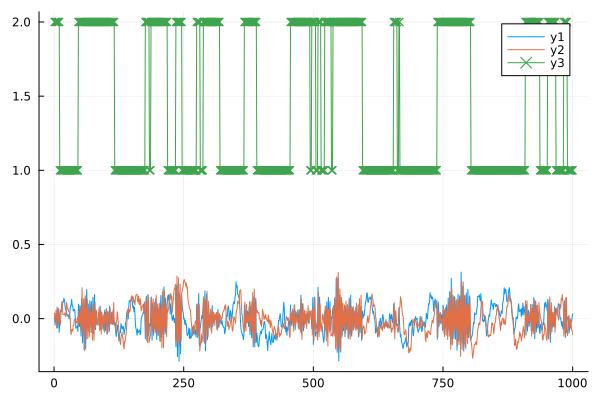

In [4]:
plot(x')
plot!(z, marker=:x)

In [5]:
using LinearAlgebra

p = model.B[1].obs_dim
d = model.B[1].latent_dim

K = model.K
A = [0.9 0.1; 0.2 0.8]
A ./= sum(A, dims=2) # Normalize rows to sum to 1

πₖ = rand(K)
πₖ ./= sum(πₖ) # Normalize to sum to 1

Q = Matrix(0.5 * I(d))

x0 = [0.0; 0.0]
P0 = Matrix(0.5 * I(d))

# set up the observation parameters
C = randn(p, d)
R = Matrix(0.001 * I(p))

B = [StateSpaceDynamics.LinearDynamicalSystem(
    StateSpaceDynamics.GaussianStateModel(0.95 * [cos(f) -sin(f); sin(f) cos(f)], Q, x0, P0),
    StateSpaceDynamics.GaussianObservationModel(C, R),
    d, p, fill(true, 6  )) for (i,f) in zip(1:K, [0.5, 0.5])]

modeli = SwitchingLinearDynamicalSystem(A, B, πₖ, model.K)

SwitchingLinearDynamicalSystem([0.9 0.1; 0.2 0.8], StateSpaceDynamics.LinearDynamicalSystem[StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([0.8337034337958541 -0.45545426167399283; 0.45545426167399283 0.8337034337958541], [0.5 0.0; 0.0 0.5], [0.0, 0.0], [0.5 0.0; 0.0 0.5]), StateSpaceDynamics.GaussianObservationModel{Float64}([-1.26568024925137 -0.9976332962608697; 1.4083219913311036 -0.33858277830853944; … ; 0.11964081053499176 1.0222783516680272; 0.6740889070887084 2.1655506694970224], [0.001 0.0 … 0.0 0.0; 0.0 0.001 … 0.0 0.0; … ; 0.0 0.0 … 0.001 0.0; 0.0 0.0 … 0.0 0.001]), 2, 10, Bool[1, 1, 1, 1, 1, 1]), StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([0.8337034337958541 -0.45545426167399283; 0.4554542

In [6]:
FB = StateSpaceDynamics.initialize_forward_backward(modeli, T)
FS = [StateSpaceDynamics.initialize_FilterSmooth(modeli.B[k], T) for k in 1:K]

ml = zeros(100,1)
for i in 1:length(ml)
    ml[i] = variational_expectation!(modeli, y, FB, FS)  
end

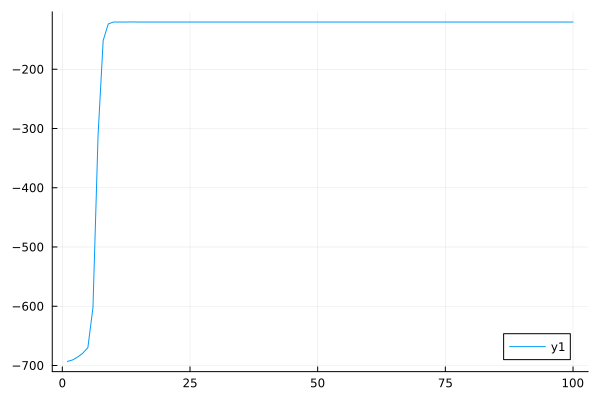

In [7]:
plot(ml)

In [8]:
mls, param_diff, FB, FS = fit!(modeli, y; max_iter=50)

Fitting SLDS via vEM... 100%|██████████████████████████████████████████████████| Time: 0:00:04 (83.07 ms/it)


([-693.1471805599322, -590.0296011741915, -308.63099480069474, -205.8165429571196, -194.75380189064282, -189.93926095709693, -189.79506485885247, -189.80109708156104, -189.81651638709795, -189.8213430533966  …  -189.79578403007432, -189.7957840302304, -189.79578403037434, -189.79578403050348, -189.79578403062231, -189.79578403073063, -189.7957840308304, -189.79578403091978, -189.79578403100066, -189.79578403107234], [11.896847812368241, 0.78481066384479, 0.48349522760008257, 0.21256133949873174, 0.14839788086247907, 0.0936211784802264, 0.06263904032282924, 0.04831575789397103, 0.03327653440382353, 0.02355131320690908  …  0.000574847450299216, 0.0005748910492442497, 0.0005749881459132869, 0.000575115300061258, 0.0005752571324720531, 0.0005754036420895814, 0.0005755484113782129, 0.0005756874057343111, 0.0005758181711083536, 0.0005759392972862413], StateSpaceDynamics.ForwardBackward{Float64}([-1.3696744865930802e-7 0.0 … -1.28785870856519e-14 0.0; -15.803522609389432 -66.54820687976108 … 

In [9]:
model.A

2×2 Matrix{Float64}:
 0.96  0.04
 0.04  0.96

In [10]:
modeli.A

2×2 Matrix{Float64}:
 0.967235  0.0327654
 0.105932  0.894068

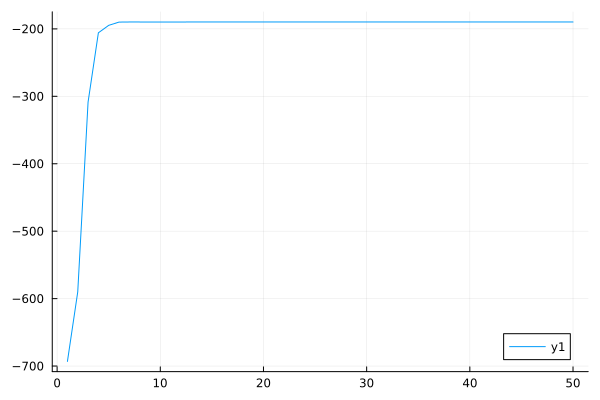

In [11]:
plot(mls)

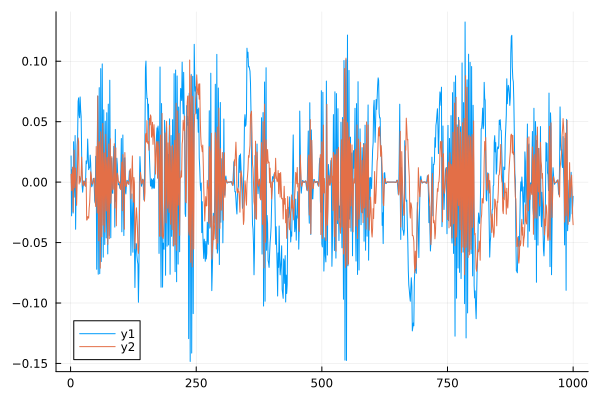

In [12]:
plot(FS[1].x_smooth')

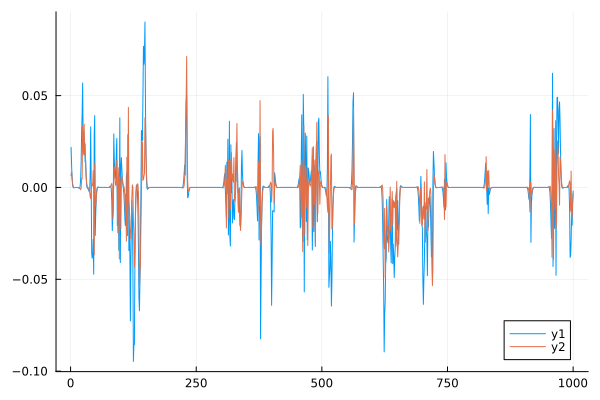

In [13]:
plot(FS[2].x_smooth')

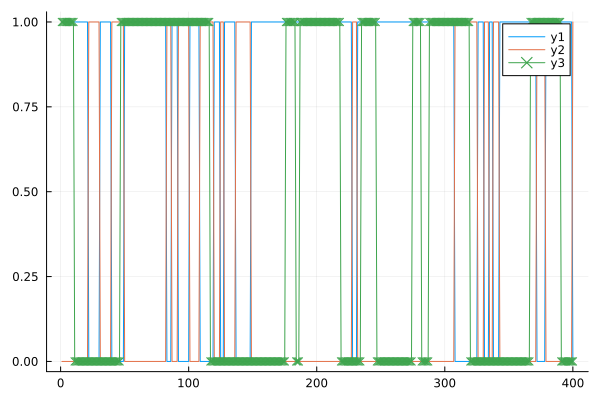

In [14]:
plot(exp.(FB.γ[:,1:400])')
plot!(z[1:400] .- 1, marker=:x)

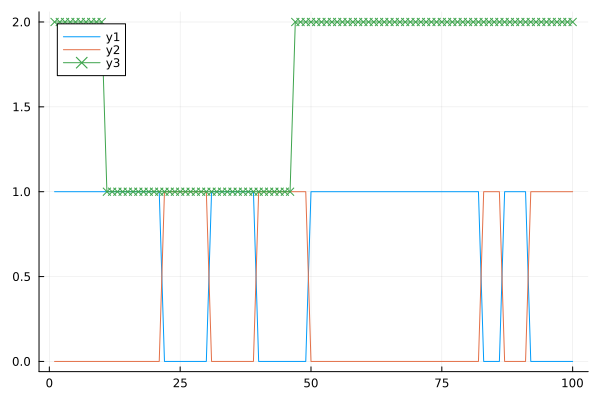

In [15]:
plot(exp.(FB.loglikelihoods[:,1:100])')
plot!(z[1:100], marker=:x)

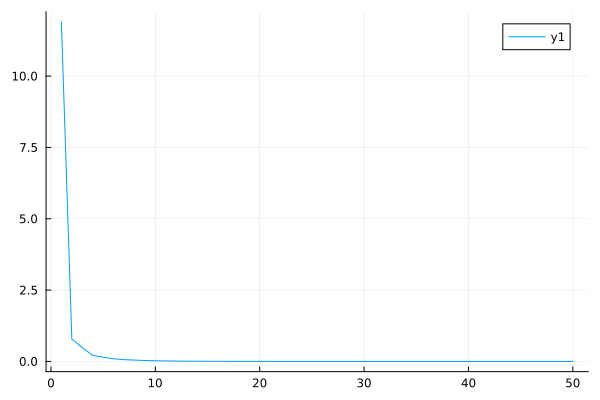

In [16]:
plot(param_diff)